In [1]:
import optuna

import octopus.dataset as ds
import octopus.visualization as vis
from octopus.core import predict, metrics
from octopus.preprocessing import compute_grad_image

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from octopus.core.metrics import *

In [2]:
import importlib

importlib.reload(predict)

<module 'octopus.core.predict' from '/Users/uzaykaradag/Developer/octopus/octopus/core/predict.py'>

In [3]:
scans, initial_elms, ground_truth_elm = ds.load_dataset()

In [4]:
scan_list = list(scans.keys())

In [5]:
test_idx = scan_list[500]
scan, initial, gt = scans[test_idx], initial_elms[test_idx], ground_truth_elm[test_idx]

In [6]:
def plot_scan(scan, predictions, gt_elm=None, credible_intervals=None, figsize=(10, 10)):
    """
    Display the ELM coordinates overlaid on the OCT scan using scatter plots.

    Parameters:
    - scan: 2D numpy array representing the OCT scan
    - 2024-08-13-01: dict where keys are model names and values are numpy arrays of shape (N, 2)
    - gt_elm: numpy array of shape (N, 2) for ground-truth ELM coordinates (optional)
    - credible_intervals: dict with same keys as 2024-08-13-01, values are tuples of lower and upper bounds (optional)
    - figsize: tuple, size of the figure (width, height) in inches
    """

    fig = plt.figure(figsize=figsize)
    plt.suptitle("")

    # Display the scan
    plt.imshow(scan, cmap='gray')

    # Color cycle for different 2024-08-13-01
    colors = plt.cm.rainbow(np.linspace(0, 1, len(predictions)))
    legend_elements = []

    # Plot true ELM if provided
    if gt_elm is not None:
        plt.scatter(gt_elm[:, 1], gt_elm[:, 0], color='green', s=1, alpha=0.5, label='External Limiting Membrane (ELM)')
        legend_elements.append(
            Line2D([0], [0], color='green', marker='o', linestyle='', markersize=5, label='External Limiting Membrane (ELM)'))

    # Plot 2024-08-13-01 and calculate metrics
    for (model_name, elm_coords), color in zip(predictions.items(), colors):
        plt.scatter(elm_coords[:, 1], elm_coords[:, 0], color=color, s=1, alpha=0.5, label=model_name)

        if gt_elm is not None:
            dice_coef = calculate_dice(elm_coords, gt_elm, image_shape=scan.shape)
            iou_score = calculate_iou(elm_coords, gt_elm, image_shape=scan.shape)
            label = f'{model_name} (DICE: {dice_coef:.4f}, IoU: {iou_score:.4f})'
        else:
            label = model_name

        legend_elements.append(Line2D([0], [0], color=color, marker='o', linestyle='', markersize=5, label=label))

        # Plot credible intervals if provided
        if credible_intervals and model_name in credible_intervals:
            lower, upper = credible_intervals[model_name]
            plt.fill_between(np.arange(len(lower)), lower, upper, color=color, alpha=0.2)

    # Remove ticks for a cleaner look
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    return fig

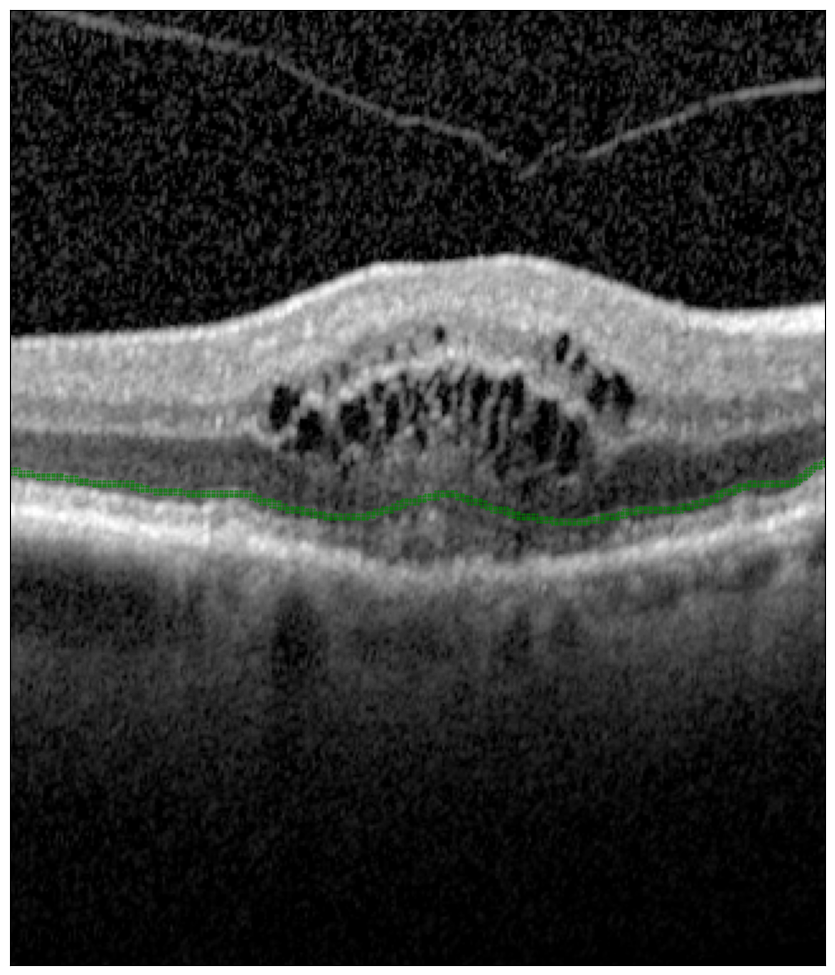

In [7]:
fig = plot_scan(scan, {}, gt_elm=gt)

In [8]:
fig.savefig('/Users/uzaykaradag/Developer/octopus/figures/ELM_on_OCT.pdf')